<a href="https://colab.research.google.com/github/arthurgusmaodematheus/Grupo-50-Cent/blob/master/IC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **INICIAÇÃO CIENTÍFICA ACABA HOJE!**


In [25]:
from nltk import word_tokenize
import nltk
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

In [56]:
df = pd.read_csv('/content/dic.csv', encoding='utf-8')

In [57]:
df.head()

,Unnamed: 0,Palavras,Unnamed: 2,Classificacao
0,1,abal,1,Positivo
1,2,abala,1,Positivo
2,3,abalad,1,Positivo
3,4,abalada,1,Positivo
4,5,abaladas,1,Positivo


In [58]:
df.Classificacao.value_counts()

Positivo    36815
Neutro      16630
Negativo     4798
Name: Classificacao, dtype: int64

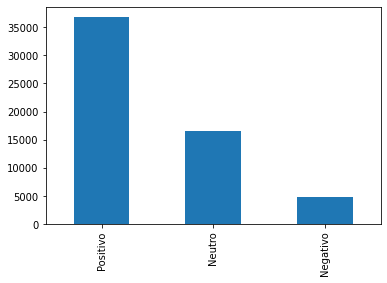

In [59]:
%matplotlib inline
df.Classificacao.value_counts().plot(kind='bar')

In [60]:
df.count()

Unnamed: 0       58243
Palavras         58230
Unnamed: 2       58243
Classificacao    58243
dtype: int64

In [61]:
df.drop_duplicates(['Palavras'], inplace=True)

In [62]:
df.Palavras.count()

26387

In [63]:
words = df['Palavras']
classes = df['Classificacao']

In [64]:
import nltk
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [66]:
def RemoveStopWords(instancia):
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [67]:
def Stemming(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    palavras = []
    for w in instancia.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))

In [68]:
def Limpeza_dados(instancia):
    # remove links, pontos, virgulas,ponto e virgulas dos tweets
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    return (instancia)

In [69]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def Lemmatization(instancia):
  palavras = []
  for w in instancia.split():
    palavras.append(wordnet_lemmatizer.lemmatize(w))
  return (" ".join(palavras))

In [70]:
RemoveStopWords('Eu não gosto do partido, e também não votaria novamente nesse governante!')

'Eu gosto partido, votaria novamente nesse governante!'

In [71]:
Stemming('Eu não gosto do partido, e também não votaria novamente nesse governante!')

'eu não gost do partido, e também não vot nov ness governante!'

In [72]:
Limpeza_dados('Assita aqui o video do Governador falando sobre a CEMIG https://www.uol.com.br :) ;)')

'assita aqui o video do governador falando sobre a cemig   '

In [73]:
Lemmatization('Os carros são bonitos')

'Os carros são bonito'

In [74]:
def Preprocessing(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

# Aplica a função em todos os dados:


In [75]:
Preprocessing('Eu não gosto do partido, e também não votaria novamente nesse governante. Assita o video aqui https:// :)')

'gosto partido, votaria novamente nesse governante assita video aqui'

In [76]:
words[:50]

0            abal
1           abala
2          abalad
3         abalada
4        abaladas
5         abalado
6        abalados
7          abalai
8         abalais
9          abalam
10       abalamos
11       abalando
12         abalar
13        abalara
14       abalaram
15       abalaras
16      abalardes
17       abalarei
18      abalareis
19       abalarem
20     abalaremos
21       abalares
22       abalaria
23      abalariam
24      abalarias
25      abalarmos
26        abalará
27       abalarás
28       abalarão
29    abalaríamos
30     abalaríeis
31         abalas
32       abalasse
33      abalassem
34      abalasses
35       abalaste
36      abalastes
37        abalava
38       abalavam
39       abalavas
40          abale
41         abalei
42        abaleis
43         abalem
44       abalemos
45         abales
46          abalo
47         abalou
48     abaláramos
49      abaláreis
Name: Palavras, dtype: object

In [77]:
from nltk.tokenize import word_tokenize


In [78]:
frase = 'A live do @blogminerando é show! :) :-) ;) =D'

In [79]:

word_tokenize(frase)

['A',
 'live',
 'do',
 '@',
 'blogminerando',
 'é',
 'show',
 '!',
 ':',
 ')',
 ':',
 '-',
 ')',
 ';',
 ')',
 '=D']

In [80]:
from nltk.tokenize import TweetTokenizer

In [81]:
palavra_tokenizer = TweetTokenizer()

In [82]:
palavra_tokenizer.tokenize(frase)

['A',
 'live',
 'do',
 '@blogminerando',
 'é',
 'show',
 '!',
 ':)',
 ':-)',
 ';)',
 '=D']

In [86]:
vectorizer = CountVectorizer(analyzer="word", tokenizer=palavra_tokenizer.tokenize)

#vectorizer = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize, max_features=1000)   

In [110]:
freq_word = vectorizer.fit_transform(words)
type(freq_word)

ValueError: ignored

In [108]:
freq_word.shape

NameError: ignored

In [ ]:
modelo = MultinomialNB()
modelo.fit(freq_words,classes)

NameError: ignored

In [ ]:
freq_tweets.A

array([[0, 0, 0, ..., 0, 0, 3],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 2],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# defina instâncias de teste dentro de uma lista
testes = ['Esse governo está no início, vamos ver o que vai dar',
          'Estou muito feliz com o governo de Minas esse ano',
          'O estado de Minas Gerais decretou calamidade financeira!!!',
          'A segurança desse país está deixando a desejar',
          'O governador de Minas é mais uma vez do PT']

In [ ]:
testes = [Preprocessing(i) for i in testes]

In [ ]:
# Transforma os dados de teste em vetores de palavras.
freq_testes = vectorizer.transform(testes)

In [ ]:
# Fazendo a classificação com o modelo treinado.
for t, c in zip (testes,modelo.predict(freq_testes)):
    print (t +", "+ c)

Esse governo está no início, vamos ver o que vai dar, Neutro
Estou muito feliz com o governo de Minas esse ano, Neutro
O estado de Minas Gerais decretou calamidade financeira!!!, Negativo
A segurança desse país está deixando a desejar, Neutro
O governador de Minas é mais uma vez do PT, Neutro


In [ ]:
# Probabilidades de cada classe
print (modelo.classes_)
modelo.predict_proba(freq_testes).round(2)

['Negativo' 'Neutro' 'Positivo']


array([[0.21, 0.79, 0.  ],
       [0.04, 0.96, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.01, 0.98, 0.  ],
       [0.14, 0.86, 0.  ]])

In [ ]:
def marque_negacao(texto):
    negacoes = ['não','not']
    negacao_detectada = False
    resultado = []
    palavras = texto.split()
    for p in palavras:
        p = p.lower()
        if negacao_detectada == True:
            p = p + '_NEG'
        if p in negacoes:
            negacao_detectada = True
        resultado.append(p)
    return (" ".join(resultado))

In [ ]:
marque_negacao('Eu gosto do partido, votaria novamente nesse governante!')

'eu gosto do partido, votaria novamente nesse governante!'

In [ ]:
marque_negacao('Eu Não gosto do partido e também não votaria novamente nesse governante!')

'eu não gosto_NEG do_NEG partido_NEG e_NEG também_NEG não_NEG votaria_NEG novamente_NEG nesse_NEG governante!_NEG'

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline_simples = Pipeline([
  ('counts', CountVectorizer()),
  ('classifier', MultinomialNB())
])

In [ ]:
pipeline_negacoes = Pipeline([
  ('counts', CountVectorizer(tokenizer=lambda text: marque_negacao(text))),
  ('classifier', MultinomialNB())
])

In [ ]:
pipeline_simples.fit(tweets,classes)

Pipeline(memory=None,
         steps=[('counts',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
pipeline_simples.steps

[('counts',
  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                  dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                  lowercase=True, max_df=1.0, max_features=None, min_df=1,
                  ngram_range=(1, 1), preprocessor=None, stop_words=None,
                  strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                  tokenizer=None, vocabulary=None)),
 ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]

In [ ]:
pipeline_negacoes.fit(tweets,classes)

Pipeline(memory=None,
         steps=[('counts',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function <lambda> at 0x7fabe2604598>,
                                 vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
pipeline_negacoes.steps

[('counts',
  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                  dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                  lowercase=True, max_df=1.0, max_features=None, min_df=1,
                  ngram_range=(1, 1), preprocessor=None, stop_words=None,
                  strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                  tokenizer=<function <lambda> at 0x7fabe2604598>,
                  vocabulary=None)),
 ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]

In [ ]:
pipeline_svm_simples = Pipeline([
  ('counts', CountVectorizer()),
  ('classifier', svm.SVC(kernel='linear'))
])

In [ ]:
pipeline_svm_negacoes = Pipeline([
  ('counts', CountVectorizer(tokenizer=lambda text: marque_negacao(text))),
  ('classifier', svm.SVC(kernel='linear'))
])

In [ ]:
resultados = cross_val_predict(pipeline_simples, tweets, classes, cv=10)

In [ ]:
metrics.accuracy_score(classes,resultados)

0.8716392020815265

In [ ]:
sentimento=['Positivo','Negativo','Neutro']
print (metrics.classification_report(classes,resultados,sentimento))

              precision    recall  f1-score   support

    Positivo       0.95      0.89      0.92      2840
    Negativo       0.80      0.87      0.83       951
      Neutro       0.81      0.84      0.83      1974

    accuracy                           0.87      5765
   macro avg       0.85      0.87      0.86      5765
weighted avg       0.88      0.87      0.87      5765



In [ ]:
print (pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo       832     111         8   951
Neutro         175    1662       137  1974
Positivo        37     272      2531  2840
All           1044    2045      2676  5765


In [ ]:
def Metricas(modelo, tweets, classes):
  resultados = cross_val_predict(modelo, tweets, classes, cv=10)
  return 'Acurácia do modelo: {}'.format(metrics.accuracy_score(classes,resultados))

In [ ]:
# naive bayes simples
Metricas(pipeline_simples,tweets,classes)

'Acurácia do modelo: 0.8716392020815265'

In [ ]:
# naive bayes com tag de negacoes
Metricas(pipeline_negacoes,tweets,classes)

'Acurácia do modelo: 0.6830875975715525'

In [ ]:
# svm linear simples
Metricas(pipeline_svm_simples,tweets,classes)

'Acurácia do modelo: 0.8945359930615785'

In [ ]:
# svm linear com tag de negacoes
Metricas(pipeline_svm_negacoes,tweets,classes)

'Acurácia do modelo: 0.7694709453599307'

In [ ]:
resultados = cross_val_predict(pipeline_negacoes, tweets, classes, cv=10)

In [ ]:
metrics.accuracy_score(classes,resultados)

0.6830875975715525

In [ ]:
sentimento=['Positivo','Negativo','Neutro']
print (metrics.classification_report(classes,resultados,sentimento))

              precision    recall  f1-score   support

    Positivo       0.69      0.89      0.78      2840
    Negativo       0.60      0.26      0.36       951
      Neutro       0.69      0.58      0.63      1974

    accuracy                           0.68      5765
   macro avg       0.66      0.58      0.59      5765
weighted avg       0.67      0.68      0.66      5765



In [ ]:
print (pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo       247     307       397   951
Neutro          77    1151       746  1974
Positivo        86     214      2540  2840
All            410    1672      3683  5765


In [ ]:
# Bigrams
vectorizer = CountVectorizer(ngram_range=(2,2))
freq_tweets = vectorizer.fit_transform(tweets)
modelo = MultinomialNB()
modelo.fit(freq_tweets,classes)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
resultados = cross_val_predict(modelo, freq_tweets, classes, cv=10)

In [ ]:
metrics.accuracy_score(classes,resultados)

0.8412836079791848

In [ ]:
sentimento=['Positivo','Negativo','Neutro']
print (metrics.classification_report(classes,resultados,sentimento))